In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/FAOSTAT_data_en_6-28-2025.csv")

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/dataset/FAOSTAT_data_en_7-24-2025.csv")

In [ ]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,591,Panama,5312,Area harvested,01311,Avocados,2018,2018,ha,380.0,A,Official figure,NaN
1,QCL,Crops and livestock products,591,Panama,5412,Yield,01311,Avocados,2018,2018,kg/ha,21994.7,A,Official figure,NaN
2,QCL,Crops and livestock products,591,Panama,5510,Production,01311,Avocados,2018,2018,t,8358.0,A,Official figure,NaN
3,QCL,Crops and livestock products,591,Panama,5312,Area harvested,01311,Avocados,2019,2019,ha,409.0,A,Official figure,NaN
4,QCL,Crops and livestock products,591,Panama,5412,Yield,01311,Avocados,2019,2019,kg/ha,26359.4,A,Official figure,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       1102 non-null   object 
 1   Domain            1102 non-null   object 
 2   Area Code (M49)   1102 non-null   int64  
 3   Area              1102 non-null   object 
 4   Element Code      1102 non-null   int64  
 5   Element           1102 non-null   object 
 6   Item Code (CPC)   1102 non-null   object 
 7   Item              1102 non-null   object 
 8   Year Code         1102 non-null   int64  
 9   Year              1102 non-null   int64  
 10  Unit              1102 non-null   object 
 11  Value             1054 non-null   float64
 12  Flag              1102 non-null   object 
 13  Flag Description  1102 non-null   object 
 14  Note              3 non-null      object 
dtypes: float64(1), int64(4), object(10)
memory usage: 129.3+ KB


In [ ]:
pivot = df.pivot_table(index=["Item", "Year"],
                       columns="Element",
                       values="Value",
                       aggfunc='first').reset_index()

pivot = pivot.rename(columns={
    "Production": "Prod_tonnes",
    "Yield" : "Yield_t_ha"
})

pivot["Yield_t_ha"] = pivot["Yield_t_ha"]/1000

In [ ]:
pivot.head()

Element,Item,Year,Area harvested,Laying,Milk Animals,Producing Animals/Slaughtered,Prod_tonnes,Stocks,Yield_t_ha,Yield/Carcass Weight
0,Avocados,2018,380.0,NaN,NaN,NaN,8358.00,NaN,21.9947,NaN
1,Avocados,2019,409.0,NaN,NaN,NaN,10781.00,NaN,26.3594,NaN
2,Avocados,2020,500.0,NaN,NaN,NaN,13000.00,NaN,26.0000,NaN
3,Avocados,2021,470.0,NaN,NaN,NaN,10593.00,NaN,22.5383,NaN
4,Avocados,2022,473.0,NaN,NaN,NaN,10106.68,NaN,21.3526,NaN


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/dataset/FAOSTAT_data_en_7-24-2025.csv")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5634 non-null   object 
 1   Domain            5634 non-null   object 
 2   Area Code (M49)   5634 non-null   int64  
 3   Area              5634 non-null   object 
 4   Element Code      5634 non-null   int64  
 5   Element           5634 non-null   object 
 6   Item Code (CPC)   5634 non-null   object 
 7   Item              5634 non-null   object 
 8   Year Code         5634 non-null   int64  
 9   Year              5634 non-null   int64  
 10  Unit              5634 non-null   object 
 11  Value             5634 non-null   float64
 12  Flag              5634 non-null   object 
 13  Flag Description  5634 non-null   object 
 14  Note              2 non-null      object 
dtypes: float64(1), int64(4), object(10)
memory usage: 660.4+ KB


In [ ]:
df2.nunique()

,0
Domain Code,1
Domain,1
Area Code (M49),1
Area,1
Element Code,9
Element,4
Item Code (CPC),365
Item,365
Year Code,6
Year,6


In [ ]:
df2["Element"].unique()

array(['Import quantity', 'Import value', 'Export quantity',
       'Export value'], dtype=object)

In [ ]:
df2.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,591,Panama,5610,Import quantity,01371,"Almonds, in shell",2018,2018,t,23.09,A,Official figure,NaN
1,TCL,Crops and livestock products,591,Panama,5622,Import value,01371,"Almonds, in shell",2018,2018,1000 USD,156.00,A,Official figure,NaN
2,TCL,Crops and livestock products,591,Panama,5610,Import quantity,01371,"Almonds, in shell",2019,2019,t,77.37,A,Official figure,NaN
3,TCL,Crops and livestock products,591,Panama,5622,Import value,01371,"Almonds, in shell",2019,2019,1000 USD,286.00,A,Official figure,NaN
4,TCL,Crops and livestock products,591,Panama,5610,Import quantity,01371,"Almonds, in shell",2020,2020,t,17.29,A,Official figure,NaN


In [ ]:
pivot2 = df2.pivot_table(index=["Item", "Year"],
                       columns="Element",
                       values="Value",
                       aggfunc='first').reset_index()

In [ ]:
pivot2 = pivot2.rename(columns={
    "Export quantity" : "Export_tonnes",
    "Export value" : "Value_usd_1000"
})

In [ ]:
pivot2.drop(columns=["Import quantity", "Import value", "Year"], inplace=True)

In [ ]:
pivot2.head()

Element,Item,Export_tonnes,Value_usd_1000
0,"Almonds, in shell",NaN,NaN
1,"Almonds, in shell",NaN,NaN
2,"Almonds, in shell",0.0,21.0
3,"Almonds, in shell",NaN,NaN
4,"Almonds, in shell",NaN,NaN


In [ ]:
pivot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item            1977 non-null   object 
 1   Export_tonnes   873 non-null    float64
 2   Value_usd_1000  883 non-null    float64
dtypes: float64(2), object(1)
memory usage: 46.5+ KB


In [ ]:
merged_df = pd.merge(pivot, pivot2, on='Item', how='inner')

In [ ]:
merged_df.head(10)

Element,Item,Year,Area harvested,Laying,Milk Animals,Producing Animals/Slaughtered,Prod_tonnes,Stocks,Yield_t_ha,Yield/Carcass Weight,Export_tonnes,Value_usd_1000
0,Avocados,2018,380.0,NaN,NaN,NaN,8358.0,NaN,21.9947,NaN,NaN,NaN
1,Avocados,2018,380.0,NaN,NaN,NaN,8358.0,NaN,21.9947,NaN,NaN,NaN
2,Avocados,2018,380.0,NaN,NaN,NaN,8358.0,NaN,21.9947,NaN,NaN,NaN
3,Avocados,2018,380.0,NaN,NaN,NaN,8358.0,NaN,21.9947,NaN,0.05,0.0
4,Avocados,2018,380.0,NaN,NaN,NaN,8358.0,NaN,21.9947,NaN,NaN,NaN
5,Avocados,2018,380.0,NaN,NaN,NaN,8358.0,NaN,21.9947,NaN,NaN,NaN
6,Avocados,2019,409.0,NaN,NaN,NaN,10781.0,NaN,26.3594,NaN,NaN,NaN
7,Avocados,2019,409.0,NaN,NaN,NaN,10781.0,NaN,26.3594,NaN,NaN,NaN
8,Avocados,2019,409.0,NaN,NaN,NaN,10781.0,NaN,26.3594,NaN,NaN,NaN
9,Avocados,2019,409.0,NaN,NaN,NaN,10781.0,NaN,26.3594,NaN,0.05,0.0


In [ ]:
merged_df.tail(10)

Element,Item,Year,Area harvested,Laying,Milk Animals,Producing Animals/Slaughtered,Prod_tonnes,Stocks,Yield_t_ha,Yield/Carcass Weight,Export_tonnes,Value_usd_1000
2430,Yautia,2020,1387.0,NaN,NaN,NaN,6930.00,NaN,4.9975,NaN,255.57,281.0
2431,Yautia,2021,1091.0,NaN,NaN,NaN,5381.00,NaN,4.9330,NaN,59.55,52.0
2432,Yautia,2021,1091.0,NaN,NaN,NaN,5381.00,NaN,4.9330,NaN,103.63,129.0
2433,Yautia,2021,1091.0,NaN,NaN,NaN,5381.00,NaN,4.9330,NaN,255.57,281.0
2434,Yautia,2022,918.0,NaN,NaN,NaN,4479.69,NaN,4.8812,NaN,59.55,52.0
2435,Yautia,2022,918.0,NaN,NaN,NaN,4479.69,NaN,4.8812,NaN,103.63,129.0
2436,Yautia,2022,918.0,NaN,NaN,NaN,4479.69,NaN,4.8812,NaN,255.57,281.0
2437,Yautia,2023,848.0,NaN,NaN,NaN,4095.28,NaN,4.8290,NaN,59.55,52.0
2438,Yautia,2023,848.0,NaN,NaN,NaN,4095.28,NaN,4.8290,NaN,103.63,129.0
2439,Yautia,2023,848.0,NaN,NaN,NaN,4095.28,NaN,4.8290,NaN,255.57,281.0


In [ ]:
merged_df["Value_per_tonne"] = merged_df["Value_usd_1000"] / merged_df["Prod_tonnes"]
merged_df["Value_per_hectare"] = merged_df["Yield_t_ha"] * merged_df["Value_per_tonne"]

In [ ]:
mean_values = merged_df.groupby("Item")[["Value_per_tonne", "Value_per_hectare"]].mean().sort_values("Value_per_hectare", ascending=False)

In [ ]:
mean_values.head(10)

Element,Value_per_tonne,Value_per_hectare
Item,,
Bananas,0.355300,19.177022
Watermelons,0.525807,12.811172
Pineapples,0.080628,5.679771
Papayas,0.089798,3.560054
"Pumpkins, squash and gourds",0.130801,1.520995
"Ginger, raw",0.107279,1.147498
Unmanufactured tobacco,0.455171,0.837593
"Chillies and peppers, green (Capsicum spp. and Pimenta spp.)",0.027674,0.522772
Cocoa beans,3.310284,0.350110


In [ ]:
pivot_grouped = merged_df.groupby("Item").agg({
    "Prod_tonnes": "mean",
    "Value_per_tonne": "mean",
    "Value_per_hectare": "mean"
}).reset_index()

In [ ]:
pivot_grouped.head()

Element,Item,Prod_tonnes,Value_per_tonne,Value_per_hectare
0,Avocados,10683.751667,0.000000,0.000000
1,Bananas,391192.338333,0.355300,19.177022
2,"Beans, dry",5874.975000,0.068124,0.030489
3,"Beer of barley, malted",256669.200000,0.013400,NaN
4,Butter of cow milk,6046.200000,0.010551,NaN


In [ ]:
pivot_start = merged_df[merged_df["Year"] == 2018]
pivot_end = merged_df[merged_df["Year"] == 2023]

In [ ]:
merged = pd.merge(pivot_start, pivot_end, on="Item", suffixes=("_2018", "_2023"))
merged["Prod_growth_%"] = 100 * (merged["Prod_tonnes_2023"] - merged["Prod_tonnes_2018"]) / merged["Prod_tonnes_2018"]

top_growth = merged.sort_values("Prod_growth_%", ascending=False)
top_growth = top_growth[["Item", "Prod_growth_%"]]
top_growth = top_growth.drop_duplicates(subset=["Item"])
top_growth.head(10)

Element,Item,Prod_growth_%
319,"Chillies and peppers, green (Capsicum spp. and...",215.023908
404,"Coffee, green",128.714823
432,Cucumbers and gherkins,109.183681
1375,Sorghum,88.668317
1096,Papayas,81.507259
959,"Onions and shallots, dry (excluding dehydrated)",56.629129
1653,Yautia,45.325763
1162,Pineapples,41.058689
0,Avocados,34.767050
390,"Coconuts, in shell",30.218129


In [ ]:
top10 = mean_values.head(10).reset_index()["Item"]

# Simula aumento del 10% de producción
for item in top10:
    item_data = merged_df[merged_df["Item"] == item]
    avg_yield = item_data["Yield_t_ha"].mean()
    avg_price_per_tonne = item_data["Value_per_tonne"].mean()

    increase_hectares = 0.10  # 10% más
    simulated_increase = avg_yield * avg_price_per_tonne * increase_hectares * 1000000  # por 1000 ha nuevas

    print(f"Si Panamá sembrara 10% más de {item}:")
    print(f"Ganancia adicional estimada: ${simulated_increase:,.2f} (Int$) por cada 1000 ha\n")

Si Panamá sembrara 10% más de Bananas:
Ganancia adicional estimada: $1,918,876.59 (Int$) por cada 1000 ha

Si Panamá sembrara 10% más de Watermelons:
Ganancia adicional estimada: $1,296,809.03 (Int$) por cada 1000 ha

Si Panamá sembrara 10% más de Pineapples:
Ganancia adicional estimada: $560,391.99 (Int$) por cada 1000 ha

Si Panamá sembrara 10% más de Papayas:
Ganancia adicional estimada: $357,023.56 (Int$) por cada 1000 ha

Si Panamá sembrara 10% más de Pumpkins, squash and gourds:
Ganancia adicional estimada: $151,676.26 (Int$) por cada 1000 ha

Si Panamá sembrara 10% más de Ginger, raw:
Ganancia adicional estimada: $119,328.30 (Int$) por cada 1000 ha

Si Panamá sembrara 10% más de Unmanufactured tobacco:
Ganancia adicional estimada: $83,759.08 (Int$) por cada 1000 ha

Si Panamá sembrara 10% más de Chillies and peppers, green (Capsicum spp. and Pimenta spp.):
Ganancia adicional estimada: $52,719.50 (Int$) por cada 1000 ha

Si Panamá sembrara 10% más de Cocoa beans:
Ganancia adicion

In [ ]:
merged_df.loc[merged_df["Item"] == "Chillies and peppers, green (Capsicum spp. and Pimenta spp.)", "Item"] = "Green Peppers"
merged_df.loc[merged_df["Item"] == "Onions and shallots, dry (excluding dehydrated)", "Item"] = "Dry Onions and Shallots"

top_growth.loc[top_growth["Item"] == "Chillies and peppers, green (Capsicum spp. and Pimenta spp.)", "Item"] = "Green Peppers"
top_growth.loc[top_growth["Item"] == "Onions and shallots, dry (excluding dehydrated)", "Item"] = "Dry Onions and Shallots"

/tmp/ipython-input-311-329422994.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_df, x="Item", y="Value_per_hectare", palette="viridis")


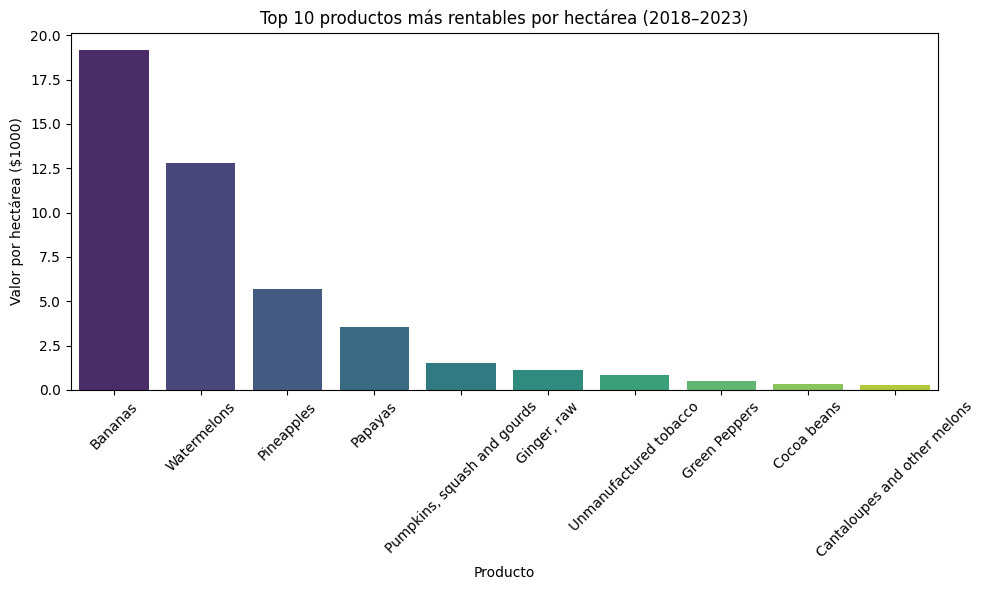

In [ ]:
graphtop10 = merged_df.groupby("Item")["Value_per_hectare"].mean().sort_values(ascending=False).head(10)

top10_df = graphtop10.reset_index()
top10_df.columns = ["Item", "Value_per_hectare"]

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_df, x="Item", y="Value_per_hectare", palette="viridis")
plt.title("Top 10 productos más rentables por hectárea (2018–2023)")
plt.ylabel("Valor por hectárea ($1000)")
plt.xlabel("Producto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

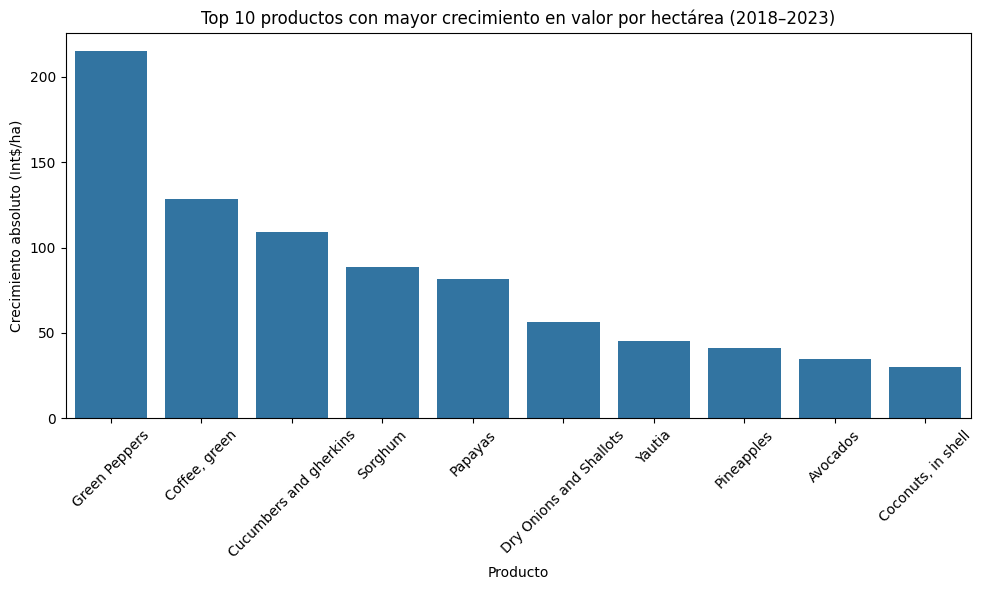

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_growth.head(10), x="Item", y="Prod_growth_%")
plt.title("Top 10 productos con mayor crecimiento en valor por hectárea (2018–2023)")
plt.ylabel("Crecimiento absoluto (Int$/ha)")
plt.xlabel("Producto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()